EDA: Diagnosing Brain Stroke 

A stroke happens when blood flow to your brain is stopped.
Brain cells begin to die after just a few minutes without blood or oxygen.Anyone can have a stroke at any age. But your chance of having a stroke increases if you have certain risk factors.
In this proyect we explore data that looks at how certain diagnostic factors (hypetension, heart_disease, average glucose levels) or parameters (gender, age) affect brain stroke outcome of patients.



This [dataset](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?select=brain_stroke.csv) is from Jillani Soft Tech kaggle's account it contains the following columns:

- `gender`: gender of the patient (Female or Male)
- `age`: age of the patient (years)
- `hypertension`: 1 if patien have hypertension, 0 if patient doesn't have hypertension
- `heart_disease`: 1 if patien have heart disease, 0 if patient doesn't have heart disease
- `work_type`: "children", "Govtjov", "Neverworked","Private", "Self-employed"
- `residence_type`: "Rural", "Urban"
- `avg_glucose_level`: average glucose level in blood
- `bmi`: Body mass index
- `smoking_status`: "formerly smoked", "never smoked", "smokes", "Unkown"
- `stroke`: 1 if patient had stroke, 0 if patient not




First, we familiarize ourselves with data. And ask, what type of data we spect to have in each variable?

- `gender`: str
- `age`: float
- `hypertension`: int
- `heart_disease`: int
- `work_type`: str
- `Residence_type`: str
- `avg_glucose_level`: float
- `bmi`: float
- `smoking_status`: int
- `stroke`: int

Next, let's load in the brain stroke data to start exploring.

 We load the data in a variable called `brain_stroke_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `brain_stroke.csv`.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# load in data
brain_stroke_data = pd.read_csv('brain_stroke.csv')
brain_stroke_data.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


The dataset have 4981 rows and 11 columns:

In [24]:
print("Number of rows and columns: ",brain_stroke_data.shape)

Number of rows and columns:  (4981, 11)


We calculate the unique values for each column. We already describe them above.

In [39]:
for column in brain_stroke_data.columns:
    print(brain_stroke_data[column].unique())

['Male' 'Female']
[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 1.32e+00 1.60e-01 4.80e-01]
[0 1]
[1 0]
['Yes' 'No']
['Priva

There is no null values found in the data:

In [5]:
# find whether columns contain null values
print(brain_stroke_data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In the smoking_status column we have some data that is write Unkown. This data is missing at Random (MAR) because we expect some people don't want to give that information. 

We do not found douplicated rows: 

In [27]:
print("Total number of duplicated row: {}".format(brain_stroke_data[brain_stroke_data.duplicated() == True].count()))

Total number of duplicated row: gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


To investigate further, we calculate summary statistics on `brain_stroke_data` using the `.describe()` method.

In [30]:
# perform summary statistics
print(brain_stroke_data.describe(include = 'all'))

        gender          age  hypertension  heart_disease ever_married  \
count     4981  4981.000000   4981.000000    4981.000000         4981   
unique       2          NaN           NaN            NaN            2   
top     Female          NaN           NaN            NaN          Yes   
freq      2907          NaN           NaN            NaN         3280   
mean       NaN    43.419859      0.096165       0.055210          NaN   
std        NaN    22.662755      0.294848       0.228412          NaN   
min        NaN     0.080000      0.000000       0.000000          NaN   
25%        NaN    25.000000      0.000000       0.000000          NaN   
50%        NaN    45.000000      0.000000       0.000000          NaN   
75%        NaN    61.000000      0.000000       0.000000          NaN   
max        NaN    82.000000      1.000000       1.000000          NaN   

       work_type Residence_type  avg_glucose_level          bmi  \
count       4981           4981        4981.000000  4981

In [9]:
# data types using .info() method
brain_stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
gender               4981 non-null object
age                  4981 non-null float64
hypertension         4981 non-null int64
heart_disease        4981 non-null int64
ever_married         4981 non-null object
work_type            4981 non-null object
Residence_type       4981 non-null object
avg_glucose_level    4981 non-null float64
bmi                  4981 non-null float64
smoking_status       4981 non-null object
stroke               4981 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 428.1+ KB


We are going to change de name of 'Residence_type' column to 'residence_type'.

In [5]:
brain_stroke_data = brain_stroke_data.rename({"Residence_type":"residence_type"}, axis = "columns")
brain_stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


To summarize the distribution of categorical data, we calculate
the number in each category using pandas method .value_counts for each column.


In [37]:
for column in brain_stroke_data.columns:
    print("{}".format(brain_stroke_data[column].value_counts()))

Female    2907
Male      2074
Name: gender, dtype: int64
78.00    102
57.00     92
54.00     85
79.00     84
51.00     84
52.00     83
55.00     82
53.00     82
45.00     82
50.00     80
59.00     78
49.00     76
31.00     75
56.00     75
61.00     75
44.00     74
47.00     74
63.00     73
37.00     73
62.00     73
60.00     72
40.00     72
41.00     71
38.00     70
39.00     70
32.00     70
80.00     70
34.00     67
43.00     67
58.00     66
        ... 
74.00     39
9.00      38
11.00     36
10.00     34
7.00      32
4.00      32
6.00      24
1.80       9
1.64       8
1.32       8
1.88       7
1.24       7
1.08       7
1.72       6
1.48       6
0.56       5
0.24       5
0.72       5
1.00       5
0.88       5
0.32       5
0.80       4
1.56       4
0.64       4
1.40       3
0.48       3
1.16       3
0.08       2
0.40       2
0.16       1
Name: age, Length: 104, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes   

We can calculate the proportion in each category. We found that in this dataset 4.98 % of the patients had a stroke and 95.0 % doen't had a stroke. 9.6 % have hypertension and 90.4 % don't have hypertension.
5.5 % have heart disease and 94.5 % don't. 65.9 % have been married and 34.1 haven't been married. 57.4 % work in the private sector, 16.1 % is self-employed, 13.5 % are children and 12.9 % work for the goberment.
50.8 % lives in the urban and 49.2 % in rural.
Also, 58.4 % of patients are Female and 41.6 % are Male. 



In [63]:
for column in brain_stroke_data.columns:
    print("{}".format(brain_stroke_data[column].value_counts(normalize = True)*100))

Female    58.361775
Male      41.638225
Name: gender, dtype: float64
78.00    2.047782
57.00    1.847019
54.00    1.706485
79.00    1.686408
51.00    1.686408
52.00    1.666332
55.00    1.646256
53.00    1.646256
45.00    1.646256
50.00    1.606103
59.00    1.565951
49.00    1.525798
31.00    1.505722
56.00    1.505722
61.00    1.505722
44.00    1.485645
47.00    1.485645
63.00    1.465569
37.00    1.465569
62.00    1.465569
60.00    1.445493
40.00    1.445493
41.00    1.425417
38.00    1.405340
39.00    1.405340
32.00    1.405340
80.00    1.405340
34.00    1.345111
43.00    1.345111
58.00    1.325035
           ...   
74.00    0.782975
9.00     0.762899
11.00    0.722746
10.00    0.682594
7.00     0.642441
4.00     0.642441
6.00     0.481831
1.80     0.180687
1.64     0.160610
1.32     0.160610
1.88     0.140534
1.24     0.140534
1.08     0.140534
1.72     0.120458
1.48     0.120458
0.56     0.100381
0.24     0.100381
0.72     0.100381
1.00     0.100381
0.88     0.100381
0.32     0.10

The proportion of the patients that had stroke and also present hypertension is 26.6 % 

In [70]:
brain_stroke_data.groupby('stroke')['hypertension'].value_counts(normalize = True)*100


stroke  hypertension
0       0               91.274033
        1                8.725967
1       0               73.387097
        1               26.612903
Name: hypertension, dtype: float64

The proportion of the patients that had stroke and also present heart disease is 18.9 %

In [71]:
brain_stroke_data.groupby('stroke')['heart_disease'].value_counts(normalize = True)*100

stroke  heart_disease
0       0                95.182759
        1                 4.817241
1       0                81.048387
        1                18.951613
Name: heart_disease, dtype: float64

The proportion of the patients that had stroke and also were ever married is  88.3%

In [72]:
brain_stroke_data.groupby('stroke')['ever_married'].value_counts(normalize = True)*100

stroke  ever_married
0       Yes             64.673569
        No              35.326431
1       Yes             88.306452
        No              11.693548
Name: ever_married, dtype: float64

The proportion of the patients that had stroke and work in private sector is 59.7 %, self-employed 26.2 %, work for the goverment 13.31 %, are children 0.8 %.

In [73]:
brain_stroke_data.groupby('stroke')['work_type'].value_counts(normalize = True)*100

stroke  work_type    
0       Private          57.299810
        Self-employed    15.613776
        children         14.177055
        Govt_job         12.909360
1       Private          59.677419
        Self-employed    26.209677
        Govt_job         13.306452
        children          0.806452
Name: work_type, dtype: float64

The proportion of the patients that had stroke and their smoking status is: never smoked 35.9 %, formerly smoked 28.2 %, unkown 18.9 %, smokes 16.9 %.

In [74]:
brain_stroke_data.groupby('stroke')['smoking_status'].value_counts(normalize = True)*100

stroke  smoking_status 
0       never smoked       36.953307
        Unknown            30.699345
        formerly smoked    16.839214
        smokes             15.508134
1       never smoked       35.887097
        formerly smoked    28.225806
        Unknown            18.951613
        smokes             16.935484
Name: smoking_status, dtype: float64

The proportion of the patients that had stroke and lives in an urban area is 54.4% and lives in a rural area are 45.6 %.

In [76]:
brain_stroke_data.groupby('stroke')['Residence_type'].value_counts(normalize = True)*100

stroke  Residence_type
0       Urban             50.644412
        Rural             49.355588
1       Urban             54.435484
        Rural             45.564516
Name: Residence_type, dtype: float64

The proportion of the patients that had stroke and are Female are 56.5 and Male are 43.5 %

In [77]:
brain_stroke_data.groupby('stroke')['gender'].value_counts(normalize = True)*100

stroke  gender
0       Female    58.461864
        Male      41.538136
1       Female    56.451613
        Male      43.548387
Name: gender, dtype: float64

The mean age of patients that had a stroke is 67.8.

In [78]:
brain_stroke_data.groupby('stroke')['age'].mean()

stroke
0    42.141348
1    67.819839
Name: age, dtype: float64

Te mean average glucose level in patients had a stroke is 132.2 and in patients that did not have a stroke is 104.6.

In [79]:
brain_stroke_data.groupby('stroke')['avg_glucose_level'].mean()

stroke
0    104.569056
1    132.175565
Name: avg_glucose_level, dtype: float64

The mean bmi of patiens that had a stoke is 30.1 and in patients that did not have a stroke is 28.4

In [80]:
brain_stroke_data.groupby('stroke')['bmi'].mean()

stroke
0    28.409698
1    30.186694
Name: bmi, dtype: float64

In [86]:
brain_stroke_data.groupby('stroke').mean().age


stroke
0    42.141348
1    67.819839
Name: age, dtype: float64

In [87]:
brain_stroke_data.groupby('stroke').median().age

stroke
0    43.0
1    71.0
Name: age, dtype: float64

We can observe in the boxplot our graphs do not overlap that means that there exist asociation between stroke and age variables.

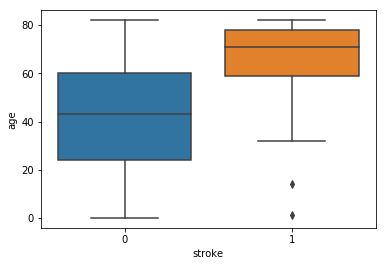

In [90]:
sns.boxplot(x='stroke', y='age', data = brain_stroke_data)
plt.show()

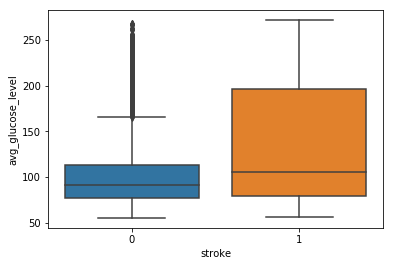

In [91]:
sns.boxplot(x='stroke', y='avg_glucose_level', data = brain_stroke_data)
plt.show()

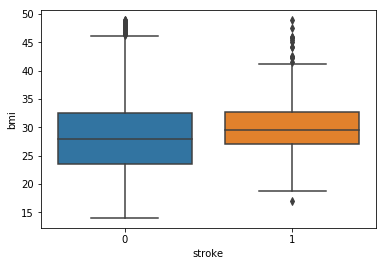

In [92]:
sns.boxplot(x='stroke', y='bmi', data = brain_stroke_data)
plt.show()

In [103]:
plt.hist(scores_GP , color="blue", label="GP", normed=True, alpha=0.5)
plt.hist(scores_MS , color="red", label="MS", normed=True, alpha=0.5)
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'avg_glucose_levels'

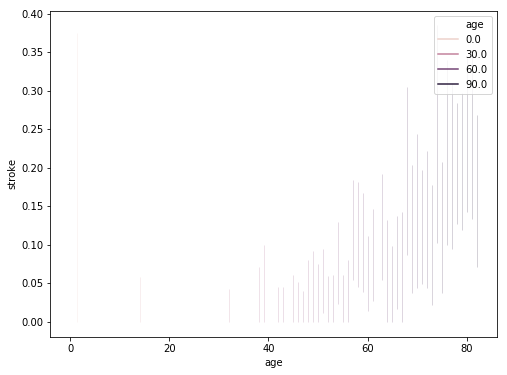

In [22]:



plt.figure(figsize=(8,6))
sns.lineplot(x=brain_stroke_data.age, y=brain_stroke_data.stroke, hue=brain_stroke_data.age)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#plt.ylabel("GDP in Trillions of U.S. Dollars");


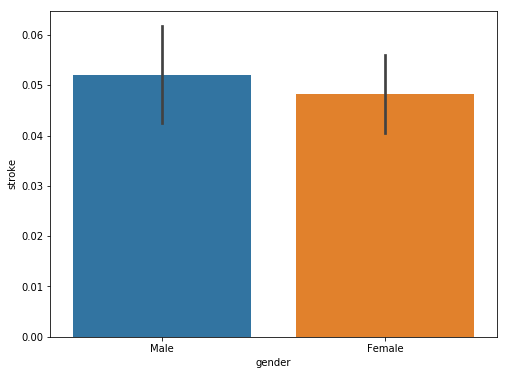

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="gender", y="stroke", data=brain_stroke_data)


We can see from the bar graph below that there are more cases of stroke in male than in female.

Exploratory Analisys (correlation)